In [7]:
# Interactive Image Labeling Notebook

import os
import shutil
from IPython.display import display, Image, clear_output
import ipywidgets as widgets

# -------------------
# CONFIGURATION
# -------------------
image_dir = "../data/images"
train_dir = os.path.join(image_dir, "train")
labels = ["henri", "thao", "nobody", "unknown", "person_leaving"]  # <<< Change these to your real labels
print(f"Current directory: {os.getcwd()}")

# -------------------
# CREATE LABEL FOLDERS
# -------------------
os.makedirs(train_dir, exist_ok=True)
for lbl in labels:
    os.makedirs(os.path.join(train_dir, lbl), exist_ok=True)




Current directory: /home/henri/Documents/Raspi-Face-Detection/scripts


In [16]:
# -------------------
# GET IMAGE LIST
# -------------------
def get_unlabeled_images():
    all_files = []
    for root, dirs, files in os.walk(image_dir):
        if train_dir in root:  # skip train dir
            continue
        for file in files:
            if file.lower().endswith((".png", ".jpg", ".jpeg")):
                all_files.append(os.path.join(root, file))
    return all_files

images = get_unlabeled_images()
img_index = 0  # track which image we're on

# -------------------
# BUTTON HANDLER
# -------------------
def label_image(label):
    global img_index, images
    if img_index >= len(images):
        return

    src_path = images[img_index]
    dst_path = os.path.join(train_dir, label, os.path.basename(src_path))
    shutil.move(src_path, dst_path)

    img_index += 1
    show_next_image()

# -------------------
# DISPLAY FUNCTION
# -------------------
def show_next_image():
    clear_output(wait=True)
    global img_index, images
    if img_index >= len(images):
        print("✅ All images have been labeled!")
        return

    img_path = images[img_index]
    display(Image(filename=img_path, width=500))

    # Create buttons for labels
    buttons = []
    for lbl in labels:
        btn = widgets.Button(description=lbl, layout=widgets.Layout(width='150px'))
        btn.on_click(lambda b, lbl=lbl: label_image(lbl))
        buttons.append(btn)

    display(widgets.HBox(buttons))

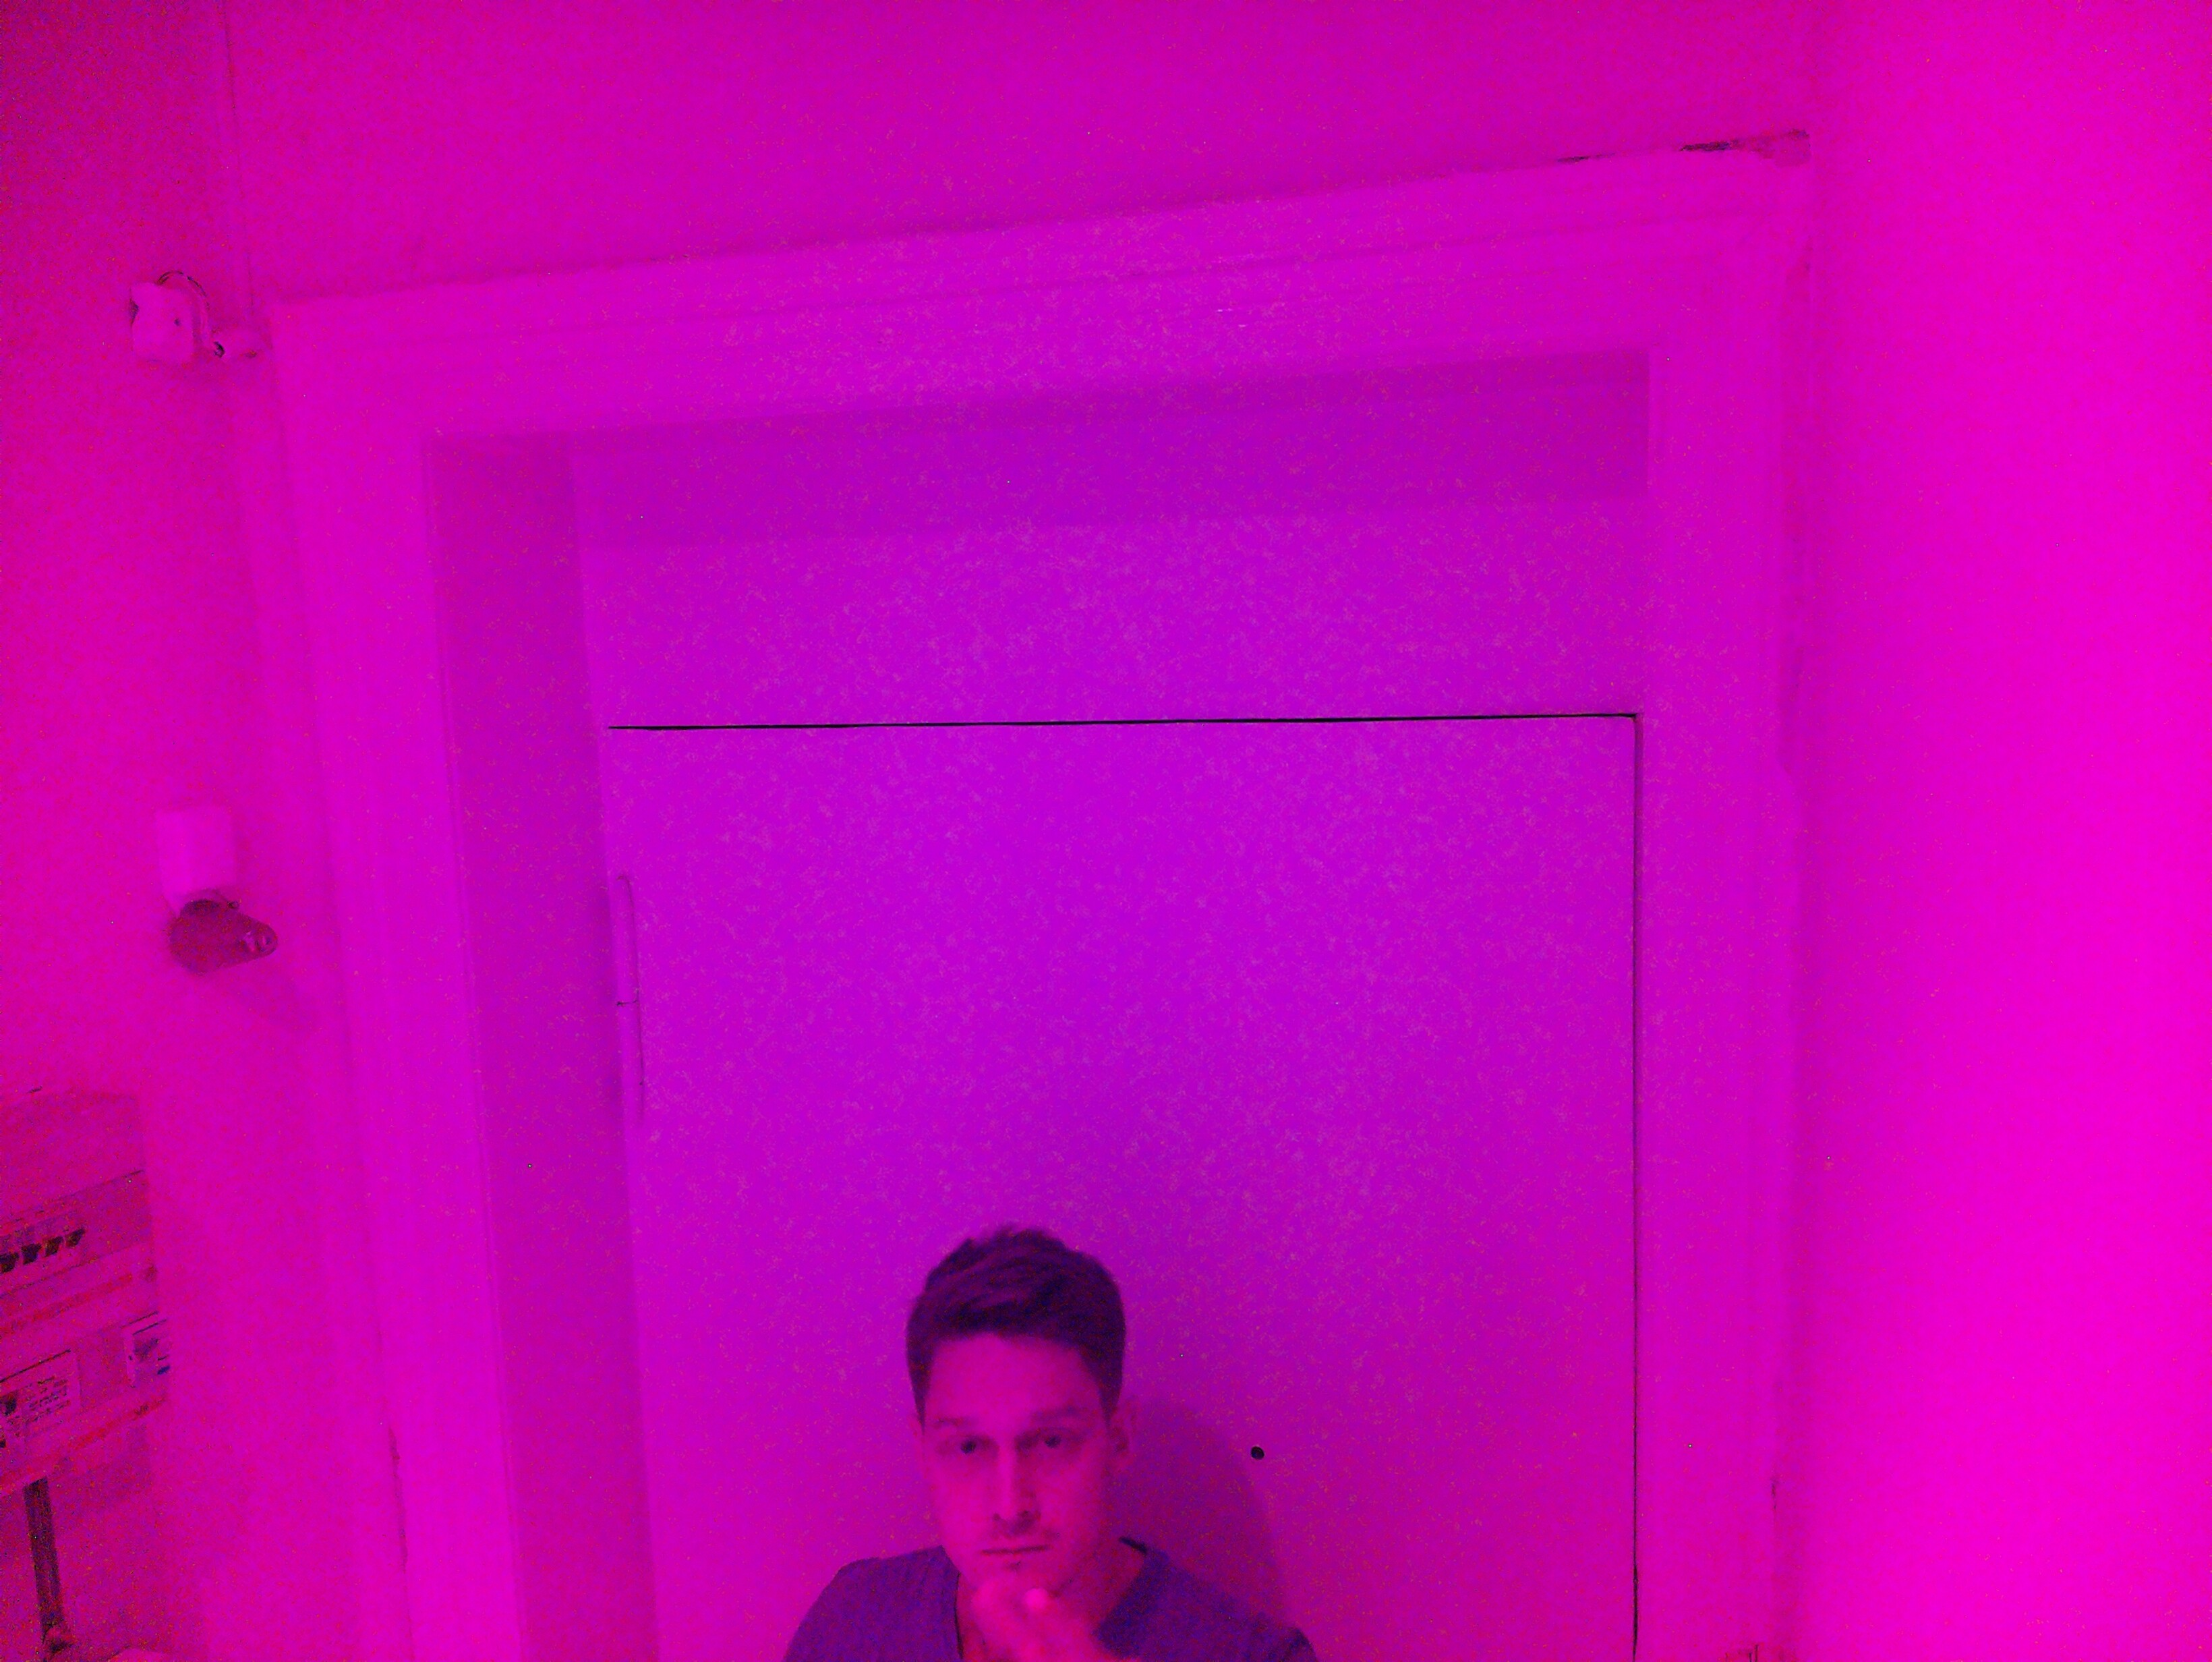

In [17]:
# -------------------
# START LABELING
# -------------------
show_next_image()